In [1]:
import numpy as np
from sklearn import datasets
diabetes=datasets.load_diabetes()

In [2]:
diabetes.data[0]     #查看第一列年龄的数据

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [3]:
#糖尿病进展的数据
diabetes.target  #数值介于25到346之间

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [4]:
#切分训练集与测试集
x_train=diabetes.data[:-20]
y_train=diabetes.target[:-20]
x_test=diabetes.data[-20:]
y_test=diabetes.target[-20:]

In [5]:
#scikit-learn库的线性回归预测模型通过fit(x,y)方法来训xaisaj型，其中x为数据的属性，y为所属的类型.线性模型的回归系数W会保存在它的coef_方法中. 
from sklearn import linear_model
linreg=linear_model.LinearRegression()   #创建线性回归

In [7]:
#用训练集训练模型
linreg.fit( x_train,y_train)
#调用预测模型的coef_属性,求出每种生理数据的回归系数b, 一共10个结果，分别对应10个生理特征.
linreg.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [8]:
#在模型上调用predict()函数，传入测试集，得到预测值，
linreg.predict( x_test )

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

In [9]:
#查看实际目标值
y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [10]:
#如何评价以上的模型优劣呢？我们可以引入方差，方差越接近于1,模型越好. 
# 方差: 统计中的方差（样本方差）是各个数据分别与其平均数之差的平方的和的平均数
linreg.score( x_test,y_test)

0.5850753022690571

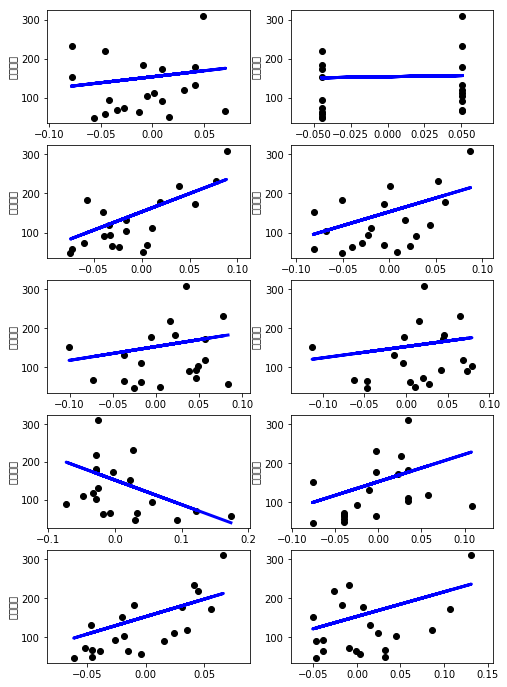

In [14]:
#对每个特征绘制一个线性回归图表
import matplotlib.pyplot as plt
#matplot显示图例中的中文问题 :   https://www.zhihu.com/question/25404709/answer/67672003
import matplotlib.font_manager as fm


plt.figure(  figsize=(8,12))
#循环10个特征
for f in range(0,10):
    #取出测试集中第f特征列的值, 这样取出来的数组变成一维的了，
    xi_test=x_test[:,f]
    #取出训练集中第f特征列的值
    xi_train=x_train[:,f]
    
    #将一维数组转为二维的
    xi_test=xi_test[:,np.newaxis]
    xi_train=xi_train[:,np.newaxis]
    
    plt.ylabel(u'病情数值')
    linreg.fit( xi_train,y_train)   #根据第f特征列进行训练
    y=linreg.predict( xi_test )       #根据上面训练的模型进行预测,得到预测结果y
    
    #加入子图
    plt.subplot(5,2,f+1)   # 5表示10个图分为5行, 2表示每行2个图, f+1表示图的编号，可以使用这个编号控制这个图
    #绘制点   代表测试集的数据分布情况
    plt.scatter(  xi_test,y_test,color='k' )
    #绘制线
    plt.plot(xi_test,y,color='b',linewidth=3)
    
plt.savefig('python_糖尿病数据集_预测病情_线性回归_最小平方回归.png')
plt.show()
